In [59]:
from glob import glob
import os
import numpy as np
import imageio.v3 as imageio
import tifffile
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

### Import Dataset

## Intersection over Union

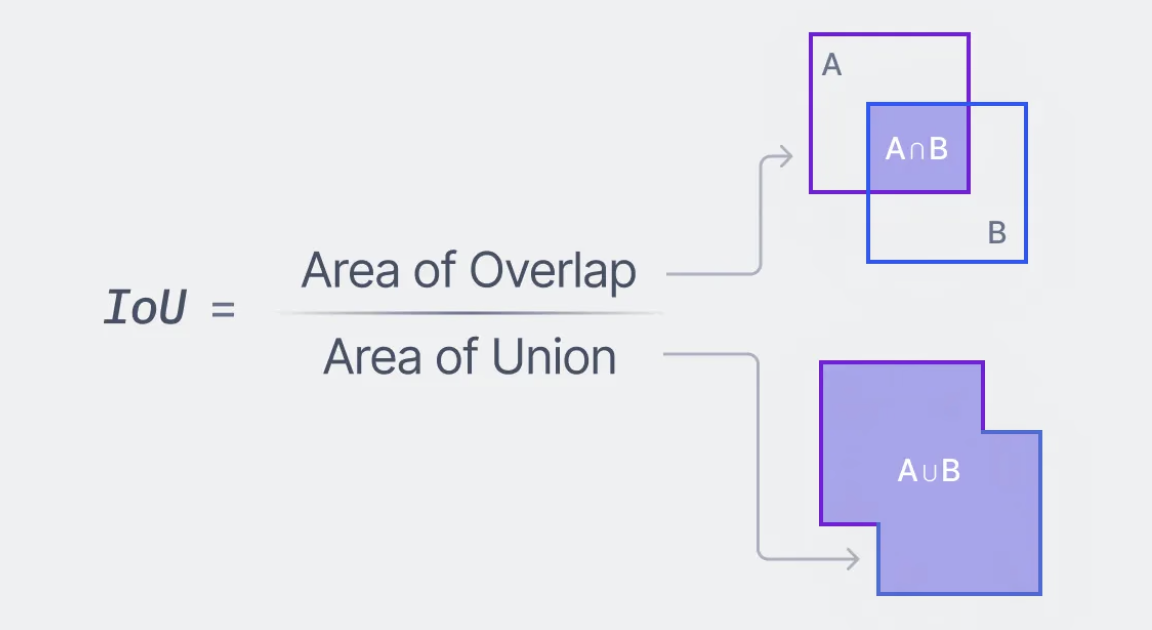

In [60]:
ground_label_dir = "/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks"
model_label_dir = "/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm"

print(ground_label_dir)
print(model_label_dir)

/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks
/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm


### Whole Image

In [61]:
def IoU_score(ground, segmentation):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)

    intersection_sum = intersection_array.sum()
    union_sum = union_array.sum()

    score = intersection_sum/union_sum

    return score

In [ ]:
def IoU_plot(ground, segmentation):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)
    
    print(intersection_array.shape)
    print(union_array.shape)

    graph_array = np.zeros(union_array.shape)
    graph_array = np.where((ground == 0) & (segmentation != 0), 1, graph_array)
    graph_array = np.where((ground != 0) & (segmentation == 0), 2, graph_array)
    graph_array = np.where(intersection_array == 1, 3, graph_array)

    cmap_building = ["black"]
    legend_patches = [mpatches.Patch(color='black', label='Empty')]

    
    if 1 in np.unique(graph_array):
        cmap_building.append("red")
        legend_patches.append(mpatches.Patch(color='red', label='Auto-segmented (Incorrect)'))

    if 2 in np.unique(graph_array):
        cmap_building.append("orange")
        legend_patches.append(mpatches.Patch(color='orange', label='Ground Truth'))

    if 3 in np.unique(graph_array):
        cmap_building.append("blue")
        legend_patches.append(mpatches.Patch(color='blue', label='Union'))

    print(cmap_building)
    print(legend_patches)

    cmap = ListedColormap(cmap_building)   

    score = IoU_score(ground=ground, segmentation=segmentation)

    plot = plt.imshow(graph_array, cmap=cmap)
    plt.legend(handles=legend_patches, title='Values', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axis("off")
    plt.title(f"IoU Score: {round(score, 5)}")
    return plot

/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S2.tif
/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S2_auto_segmentation.tif


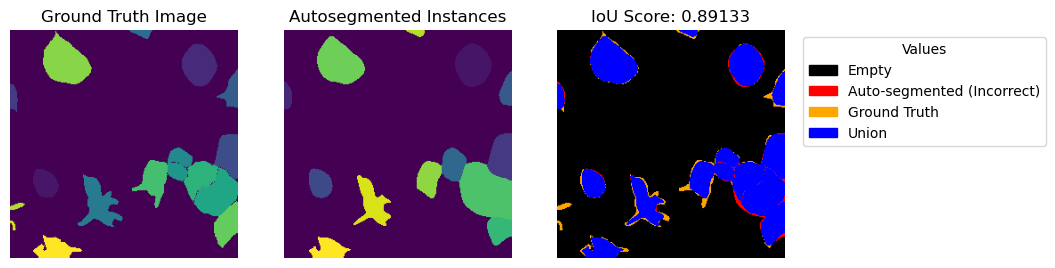

/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S3.tif
/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S3_auto_segmentation.tif


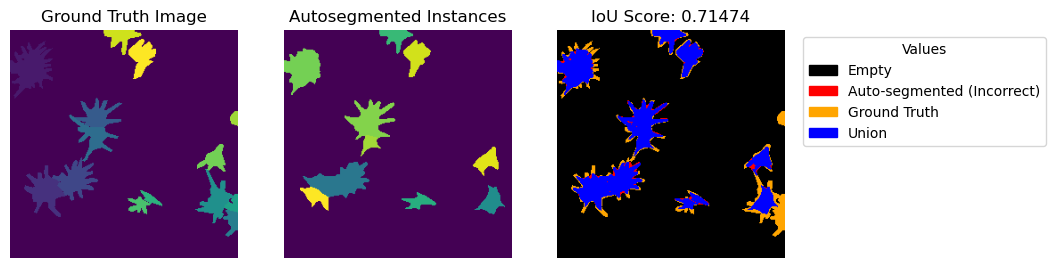

/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S4.tif
/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S4_auto_segmentation.tif


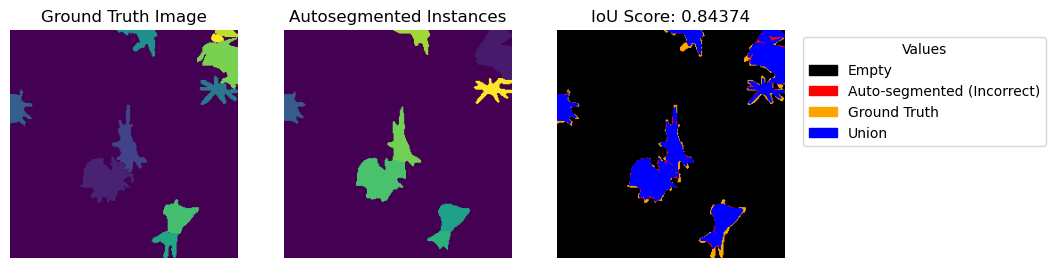

In [63]:
ground_label_paths = sorted(glob(os.path.join(ground_label_dir, "*.tif")))
model_label_paths = sorted(glob(os.path.join(model_label_dir, "*.tif")))

for ground_label_path, model_label_path in zip(ground_label_paths, model_label_paths):
    print(ground_label_path)
    print(model_label_path)
    
    ground = tifffile.imread(ground_label_path)
    segmentation = tifffile.imread(model_label_path)

    fig, ax = plt.subplots(1, 3, figsize=(10, 10))

    ax[0].imshow(ground[100])
    ax[0].set_title("Ground Truth Image")
    ax[0].axis("off")

    ax[1].imshow(segmentation[100])
    ax[1].set_title("Autosegmented Instances")
    ax[1].axis("off")

    ax[2] = IoU_plot(ground[100], segmentation[100])

    plt.show()
    plt.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation

def compute_graph_array(ground, segmentation):
    intersection_array = np.where((ground > 0) & (segmentation > 0) & (ground != 0), 1, 0)
    union_array = np.where((ground != 0) | (segmentation != 0), 1, 0)
    
    graph_array = np.zeros(union_array.shape)
    graph_array = np.where((ground == 0) & (segmentation != 0), 1, graph_array)
    graph_array = np.where((ground != 0) & (segmentation == 0), 2, graph_array)
    graph_array = np.where(intersection_array == 1, 3, graph_array)

    return graph_array

def animate_IoU_plot(ground_stack, segmentation_stack, interval=500):
    ground_seg_pairs = list(zip(ground_stack, segmentation_stack))
    fig, ax = plt.subplots()

    def update(frame):
        ground, segmentation = ground_seg_pairs[frame]
        score = IoU_score(ground=ground, segmentation=segmentation)
        graph_array = compute_graph_array(ground, segmentation)

        cmap_building = ["black"]
        legend_patches = [mpatches.Patch(color='black', label='Empty')]
        
        if 1 in np.unique(graph_array):
            cmap_building.append("red")
            legend_patches.append(mpatches.Patch(color='red', label='Auto-segmented (Incorrect)'))

        if 2 in np.unique(graph_array):
            cmap_building.append("orange")
            legend_patches.append(mpatches.Patch(color='orange', label='Ground Truth'))

        if 3 in np.unique(graph_array):
            cmap_building.append("blue")
            legend_patches.append(mpatches.Patch(color='blue', label='Union'))

        cmap = ListedColormap(cmap_building)   

        ax.legend(handles=legend_patches, title='Values', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.axis("off")
        ax.set_title("IoU Over Time")

        im = ax.imshow(graph_array, cmap=cmap)
        ax.set_title(f"IoU Frame {frame+1}, Score = {round(score, 5)}")
        return [im]

    anim = FuncAnimation(fig, update, frames=len(ground_seg_pairs), interval=interval, blit=True)
    plt.show()
    return anim


In [65]:
print(ground_label_paths)
model_label_paths

['/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S2.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S3.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S4.tif']


['/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S2_auto_segmentation.tif',
 '/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S3_auto_segmentation.tif',
 '/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S4_auto_segmentation.tif']

In [66]:
ground_stack = tifffile.imread(ground_label_paths[0])
segmentation_stack = tifffile.imread(model_label_paths[0])

# ground = ground_stack[100]
# segmentation = segmentation_stack[100]

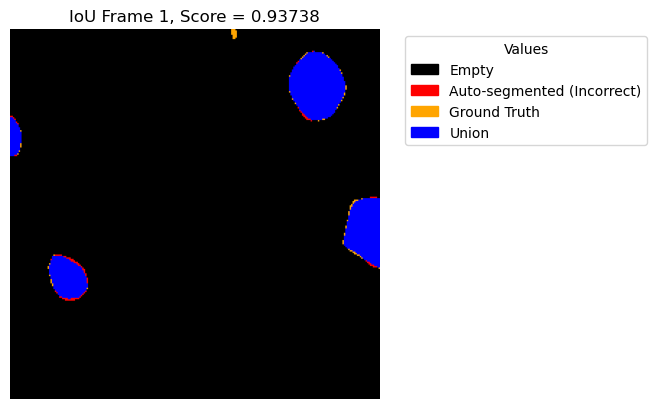

In [67]:
# Create pairs
ground_seg_pairs = list(zip(ground_stack, segmentation_stack))

# Create and save the animation
anim = animate_IoU_plot(ground_seg_pairs)
anim.save("iou_animation_SX.gif", writer="pillow", fps=5)


In [ ]:
def plot_IoU_over_time(ground, segmentation):
    scores = []
    for i in range(len(ground)):
        scores.append(IoU_score(ground[i], segmentation[i]))
    # plt.imshow(segmentation[-1])
    # plt.show()


    plt.title("IoU over time")
    plt.xlabel("frame")
    plt.ylabel("IoU score")
    plt.ylim(0, 1)
    plt.plot(scores)
    

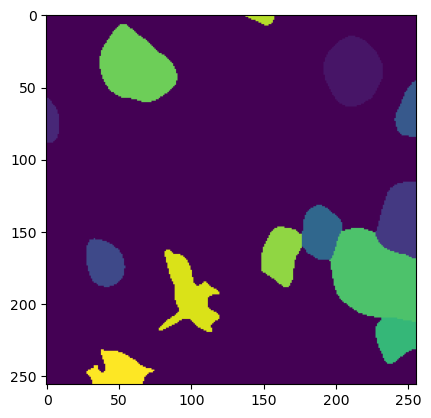

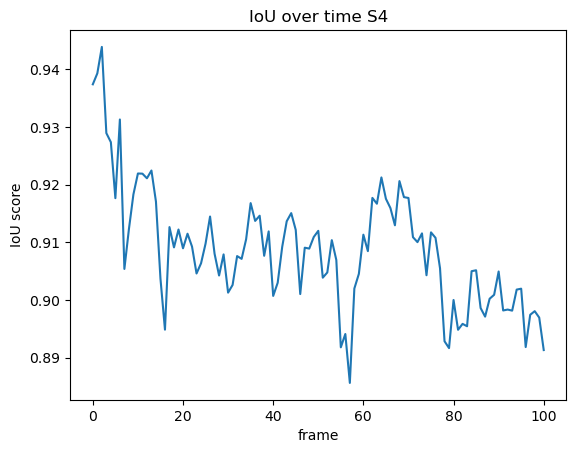

In [69]:
plot_IoU_over_time(ground_stack, segmentation_stack)

### Cell By Cell

We also can also evaluate the results by analysing the accuracy for each individual cell

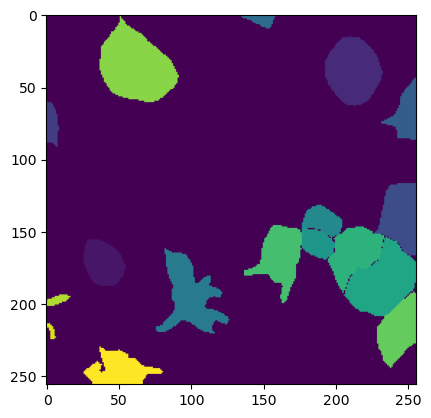

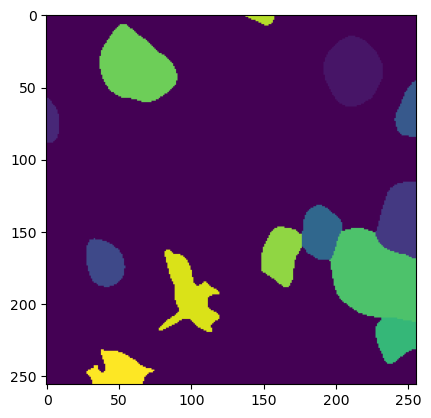

In [226]:
ground_img = ground_stack[100]
segmentation_img = segmentation_stack[100]

plt.imshow(ground_img)
plt.show()
plt.imshow(segmentation_img)
plt.show()

In [71]:
def cellByCell_IoU(ground, segmentation):
    for i in range(ground.shape[0]):
        ground_img = ground[i]
        segmentation_img = segmentation[i]

        for id in np.unique(ground_img):
            if (id == 0):
                continue

            overlap = np.where(ground_img == id, segmentation_img, 0)
            overlapping_ids = list(np.unique(overlap))

            ground_img_filtered = np.where(ground_img == id, 1, 0)

            segmentation_img_filtered = segmentation_img
            
            for overlapping_id in overlapping_ids:
                if (overlapping_id == 0):
                    segmentation_img_filtered = np.where(True, 0, 0)
                else:
                    segmentation_img_filtered = np.where(segmentation_img == overlapping_id, segmentation_img, segmentation_img_filtered)
            
            score = IoU_score(ground=ground_img_filtered, segmentation=segmentation_img_filtered)
            # print("Frame: " i )

            if (i == 100):
                plot = IoU_plot(ground_img_filtered, segmentation_img_filtered)
                plt.legend("off")
                plt.show()
    


In [72]:
import numpy as np
import pandas as pd

def cellByCell_IoU_centroid_manual(ground, segmentation):
    records = []

    num_frames = ground.shape[0]

    for frame_idx in range(num_frames):
        ground_img = ground[frame_idx]        # (height, width) 2D array
        segmentation_img = segmentation[frame_idx]  # (height, width) 2D array

        for g_id in np.unique(ground_img):
            if g_id == 0:
                continue  # skip background (ID 0)

            # Binary mask for ground-truth cell
            ground_mask = (ground_img == g_id).astype(np.uint8)

            # Manually compute centroid from mask
            indices = np.argwhere(ground_mask == 1)  # (row, col) positions
            if indices.size == 0:
                continue  # no pixels for this ID, skip

            centroid = indices.mean(axis=0)  # (y, x) = (row, column)
            y, x = np.round(centroid).astype(int)  # round to nearest pixel

            # Bounds check to avoid index errors
            if (0 <= y < ground_img.shape[0]) and (0 <= x < ground_img.shape[1]):
                s_id = segmentation_img[y, x]
            else:
                s_id = 0  # outside image bounds

            if s_id == 0:
                continue  # no corresponding segmentation label at centroid

            # Binary mask for the corresponding segmentation object
            segmentation_mask = (segmentation_img == s_id).astype(np.uint8)

            # Compute IoU
            score = IoU_score(ground=ground_mask, segmentation=segmentation_mask)

            # Save record
            records.append({
                'frame': frame_idx,
                'cell_id_ground': g_id,
                'cell_id_segmentation': s_id,
                'IoU': score
            })

    # Make the dataframe
    iou_df = pd.DataFrame(records)
    return iou_df


In [ ]:
ground_stack.shape
ground_stack = ground_stack[:, 128:, 128:]

In [232]:
segmentation_stack.shape
segmentation_stack = segmentation_stack[:, 128:, 128:]

In [235]:
# Each cell 
iou_df = cellByCell_IoU_centroid_manual(ground,segmentation)
iou_df

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


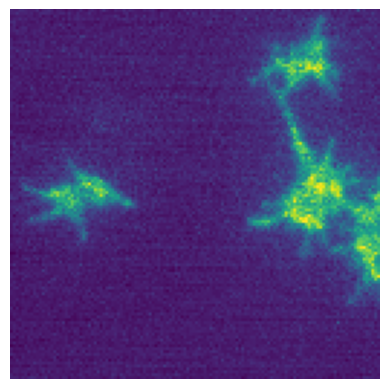

In [228]:
fig, ax = plt.subplots()

image = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Images/S3.tif")
image = image[:, 128: , 128:]


im = ax.imshow(image[0,:,:])

def init():
    im.set_data(image[0,:,:])
    plt.axis("off")
    return (im,)

def animate(i):
    data_slice = image[i,:,:]
    im.set_data(data_slice)
    plt.axis("off")
    return (im,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

anim.save("Platelets.gif", writer="pillow", fps=15)

(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x34338fd10>, <matplotlib.patches.Patch object at 0x303f59d30>, <matplotlib.patches.Patch object at 0x33f17a150>, <matplotlib.patches.Patch object at 0x33de12060>]


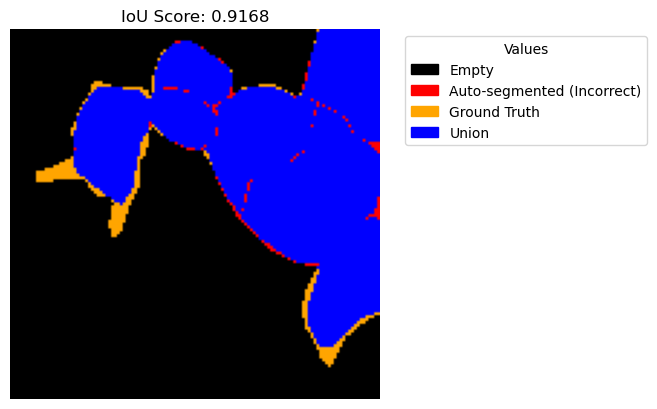

In [238]:
IoU_plot(ground_img, segmentation_img)

0.0
4.0
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x342f4c9b0>, <matplotlib.patches.Patch object at 0x33f0ee300>, <matplotlib.patches.Patch object at 0x33ef1e000>, <matplotlib.patches.Patch object at 0x343409730>]


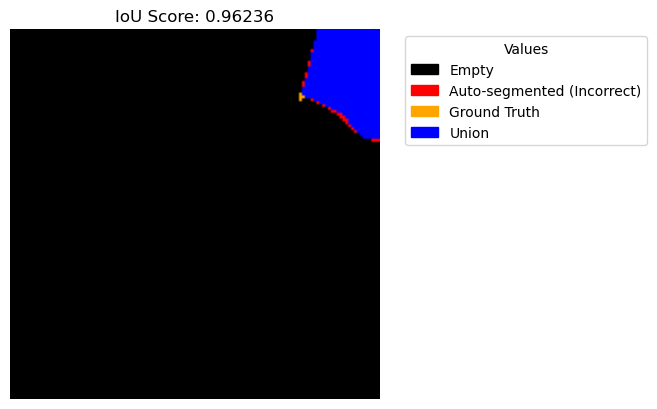

7.0
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x34301aa20>, <matplotlib.patches.Patch object at 0x33ef06900>, <matplotlib.patches.Patch object at 0x3430ffad0>, <matplotlib.patches.Patch object at 0x33de11640>]


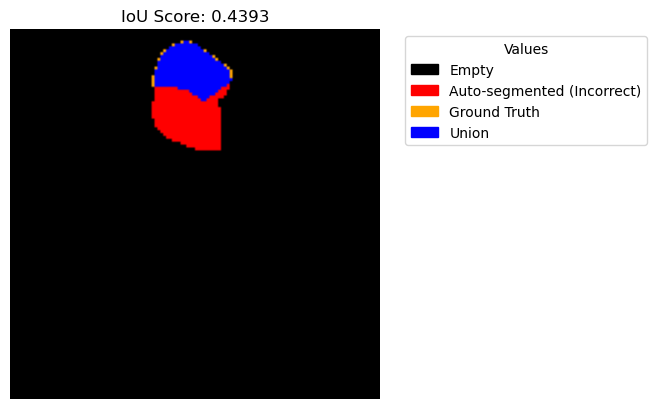

8.0
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x33ed8eb10>, <matplotlib.patches.Patch object at 0x33eb52180>, <matplotlib.patches.Patch object at 0x33ef1e000>, <matplotlib.patches.Patch object at 0x33f198470>]


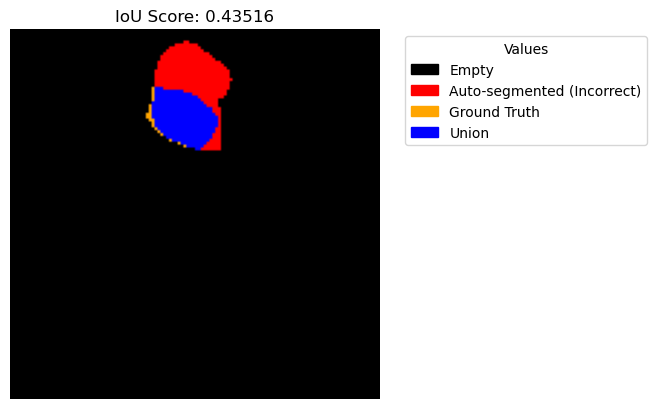

9.0
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x33f0ee030>, <matplotlib.patches.Patch object at 0x33ee8e3c0>, <matplotlib.patches.Patch object at 0x33f05bef0>, <matplotlib.patches.Patch object at 0x33f37e330>]


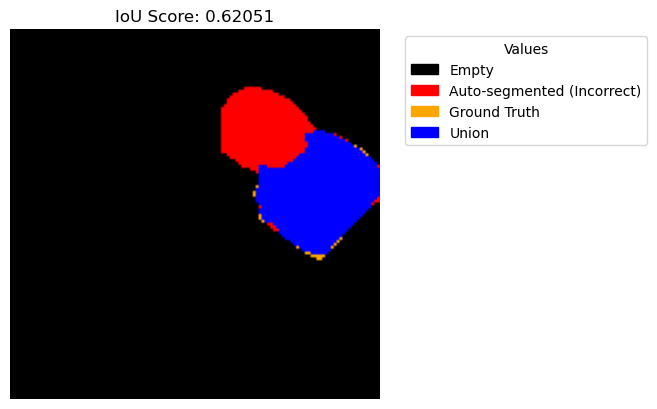

10.0
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x33f4b3740>, <matplotlib.patches.Patch object at 0x33f46e330>, <matplotlib.patches.Patch object at 0x33f46c800>, <matplotlib.patches.Patch object at 0x33f46cb00>]


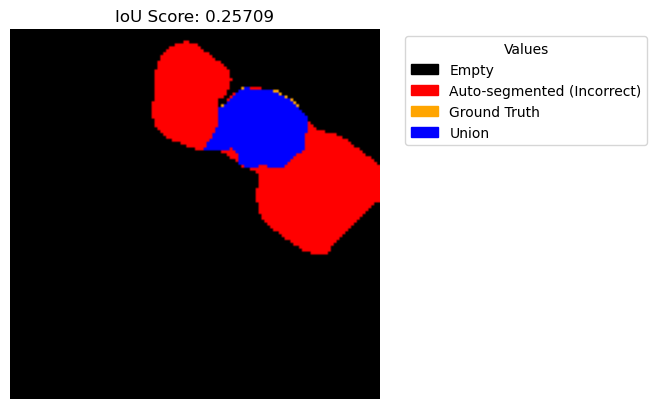

11.0
(128, 128)
(128, 128)
['black', 'orange']
[<matplotlib.patches.Patch object at 0x33f4063c0>, <matplotlib.patches.Patch object at 0x33f407e30>]


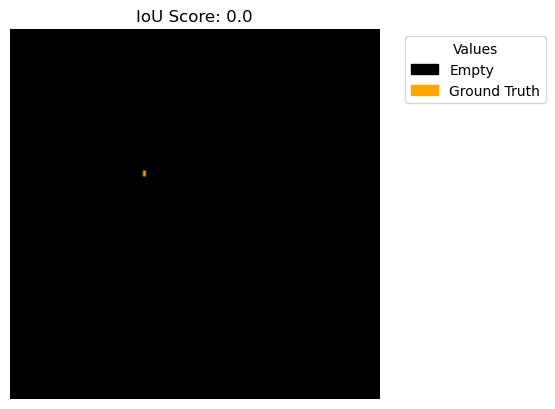

12.0
(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x33f3440e0>, <matplotlib.patches.Patch object at 0x33f3c4410>, <matplotlib.patches.Patch object at 0x33f37e8a0>, <matplotlib.patches.Patch object at 0x33f37e810>]


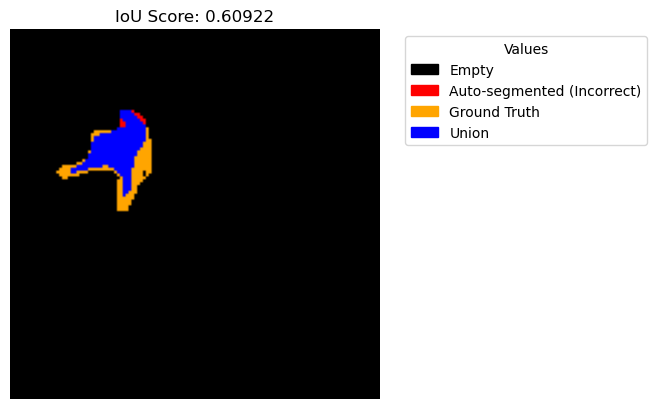

In [239]:
ground_img = ground_stack[40]
segmentation_img = segmentation_stack[40]


for i in np.unique(ground_img):
    print(i)
    if (i == 0):
        continue

    overlap = np.where(ground_img == i, segmentation_img, 0)
    overlapping_ids = list(np.unique(overlap))

    ground_img_filtered = np.where(ground_img == i, 1, 0)

    segmentation_img_filtered = segmentation_img
    
    for i in overlapping_ids:
        if (i == 0):
            segmentation_img_filtered = np.where(True, 0, 0)
        else:
            segmentation_img_filtered = np.where(segmentation_img == i, segmentation_img, segmentation_img_filtered)


    plot = IoU_plot(ground_img_filtered, segmentation_img_filtered)
    plt.show()


Using apple MPS device.




Compute Image Embeddings 2D.: 100%|██████████| 1/1 [00:06<00:00,  6.97s/it]


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]


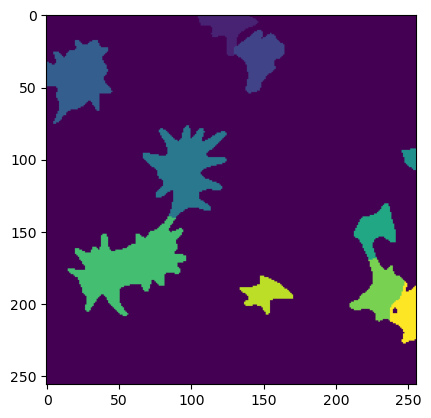

In [104]:
import run_model

image = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Images/S3.tif")
ground = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S3.tif")

segmentation = run_model.run_automatic_instance_segmentation(image=image[99],
                                              checkpoint_path='/Users/jakesolsky/PlateletImageSegmentation/Models/microSAM/best_Jacob0916s3.pt')

plt.imshow(segmentation)

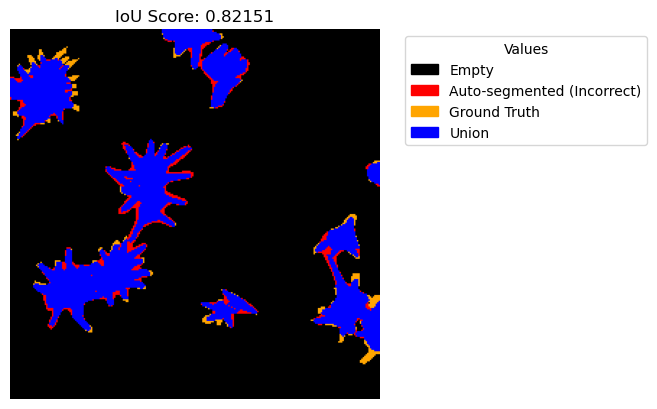

In [100]:
IoU_plot(ground=ground[100], segmentation=segmentation)

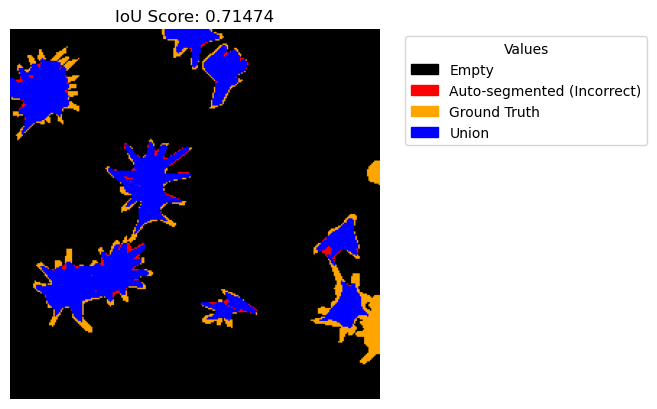

In [102]:
auto_seg = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S3_auto_segmentation.tif")

IoU_plot(ground=ground[100], segmentation=auto_seg[100])

In [113]:
# Splitting images into test images: 
Image_name = "S4"

images_test = tifffile.imread(f"/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Images/{Image_name}.tif")
images_test = images_test[:, 128:256, 128:256]
tifffile.imwrite(f"/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/Test_Images/{Image_name}.tif", images_test)

In [122]:
SAM_output_dir = "/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm"
SAM_finetuned_output_dir = "/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/finetuned_Raw_vit_b_lm"
ground_dir = "/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks"

SAM_output_paths = sorted(glob(os.path.join(SAM_output_dir, "*test.tif")))
SAM_finetuned_output_paths = sorted(glob(os.path.join(SAM_finetuned_output_dir, "*test.tif")))
ground_paths = sorted(glob(os.path.join(ground_dir, "*.tif")))

print(SAM_output_paths)
print(SAM_finetuned_output_paths)
print(ground_paths)

['/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S2_auto_segmentation_test.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S3_auto_segmentation_test.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/vit_b_lm/S4_auto_segmentation_test.tif']
['/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/finetuned_Raw_vit_b_lm/S2_auto_segmentation_test.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/finetuned_Raw_vit_b_lm/S3_auto_segmentation_test.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Auto segmented data testing/micro-SAM/finetuned_Raw_vit_b_lm/S4_auto_segmentation_test.tif']
['/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S2.tif', '/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Masks/Mask_S3.tif', '/Use

(101, 128, 128)
segmentation_SAM


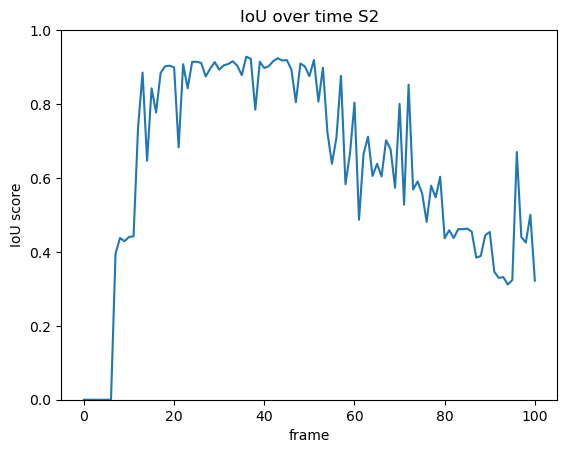

segmentation_SAM_finetuned


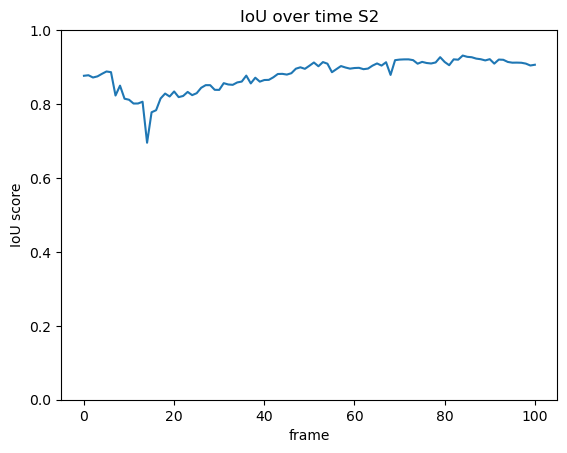

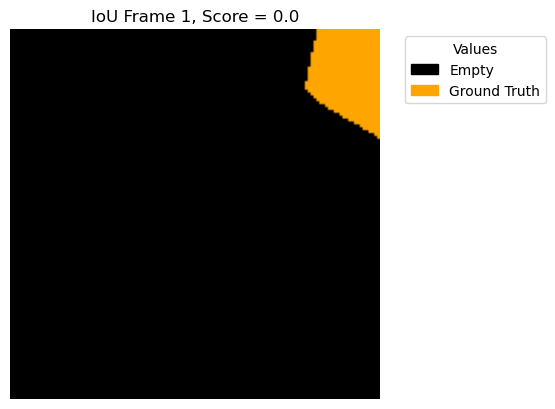

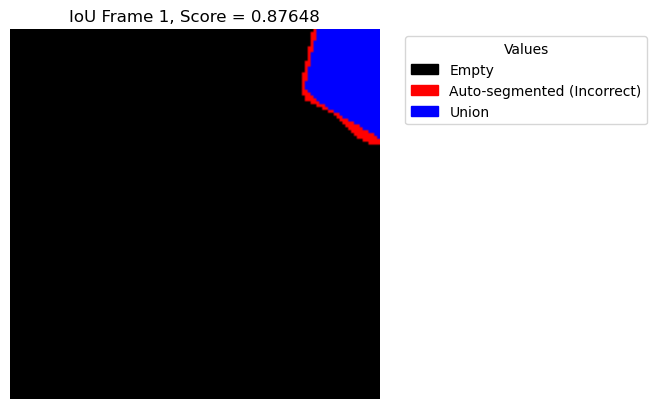

(101, 128, 128)
segmentation_SAM


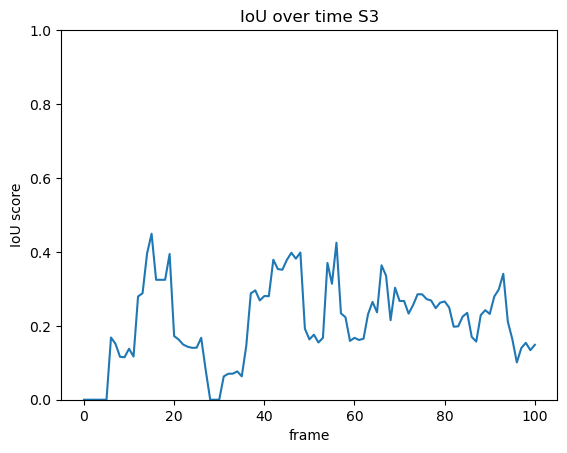

segmentation_SAM_finetuned


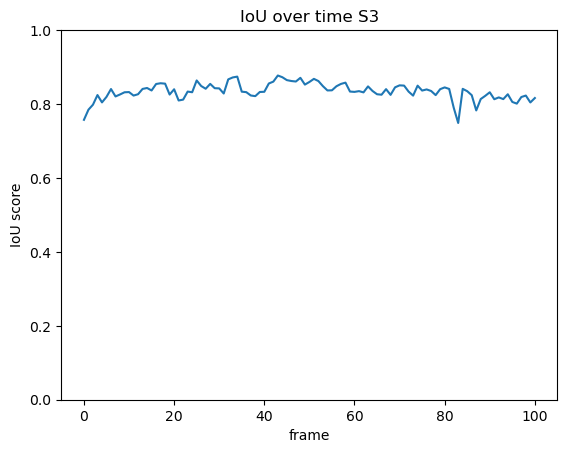

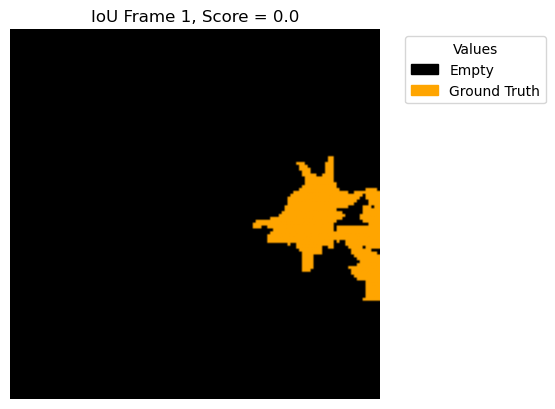

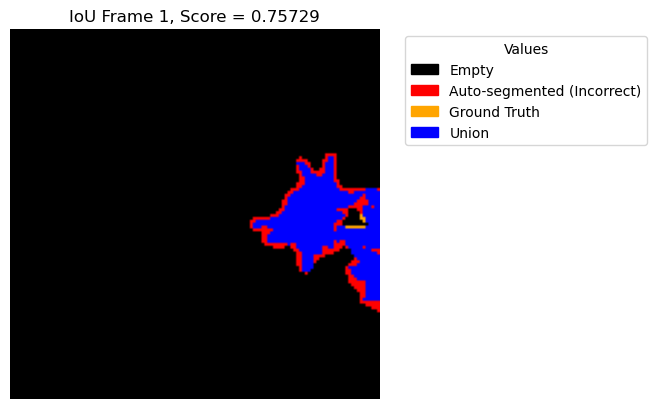

(101, 128, 128)
segmentation_SAM


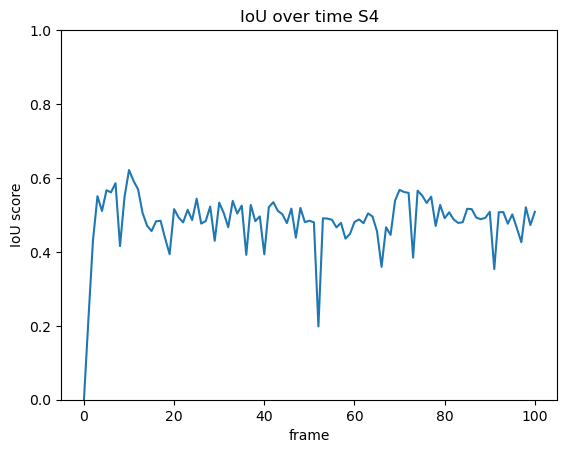

segmentation_SAM_finetuned


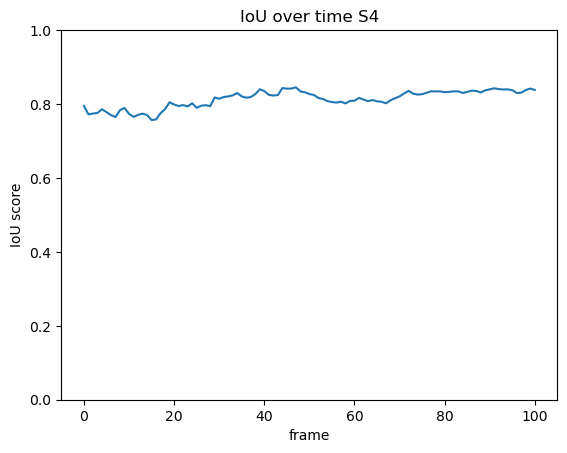

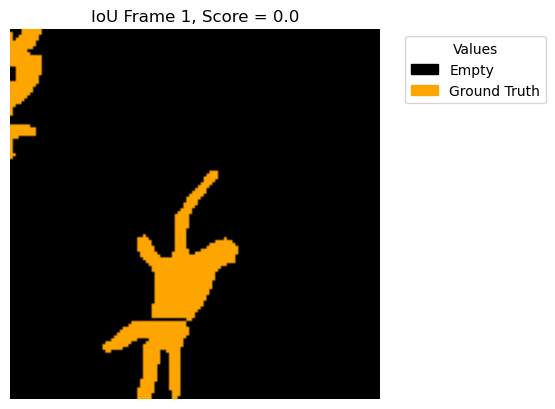

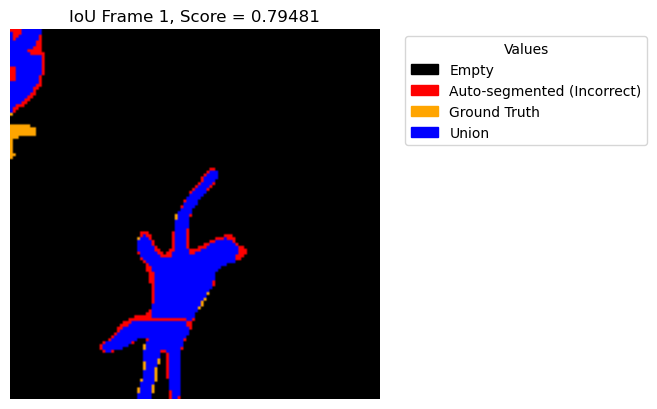

In [241]:
for i in range(len(ground_paths)):
    ground = tifffile.imread(ground_paths[i])
    ground = ground[:, 128:256, 128:256]
    
    segmentation_SAM = tifffile.imread(SAM_output_paths[i])
    segmentation_SAM_finetuned = tifffile.imread(SAM_finetuned_output_paths[i])
    print(ground.shape)

    print("segmentation_SAM")
    plot_IoU_over_time(ground=ground, segmentation=segmentation_SAM)
    plt.title(f"IoU over time S{i+2}")
    plt.show()
    print("segmentation_SAM_finetuned")
    plot_IoU_over_time(ground=ground, segmentation=segmentation_SAM_finetuned)
    plt.title(f"IoU over time S{i+2}")
    plt.show()

    anim = animate_IoU_plot(ground_stack=ground, segmentation_stack=segmentation_SAM)
    # anim.save(f"iou_animation_S{i+2}.gif", writer="pillow", fps=5)

    anim = animate_IoU_plot(ground_stack=ground, segmentation_stack=segmentation_SAM_finetuned)
    # anim.save(f"iou_animation_S{i+2}_finetuned.gif", writer="pillow", fps=5)
    

In [219]:
image = tifffile.imread("/Users/jakesolsky/PlateletImageSegmentation/Data/Training Data/Raw/Images/S3.tif")
tifffile.imwrite("SINGLEFRAME_TEST.tif", image[99])

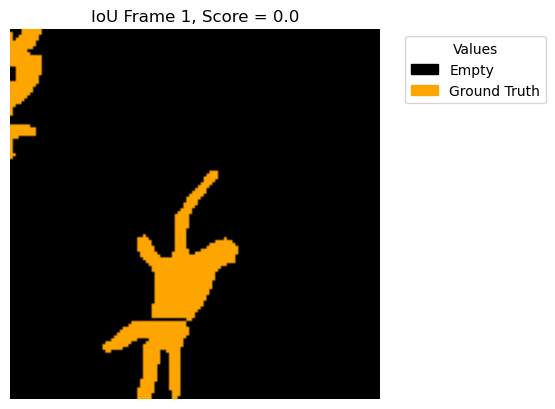

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


In [217]:
anim = animate_IoU_plot(ground_stack=ground, segmentation_stack=segmentation_SAM)
anim.save("iou_animation_S4.gif", writer="pillow", fps=5)

(128, 128)
(128, 128)
['black', 'red', 'orange', 'blue']
[<matplotlib.patches.Patch object at 0x34c19be30>, <matplotlib.patches.Patch object at 0x34c1f8bf0>, <matplotlib.patches.Patch object at 0x34b264800>, <matplotlib.patches.Patch object at 0x11c78c080>]
(array([0], dtype=uint32), array([16384]))


False

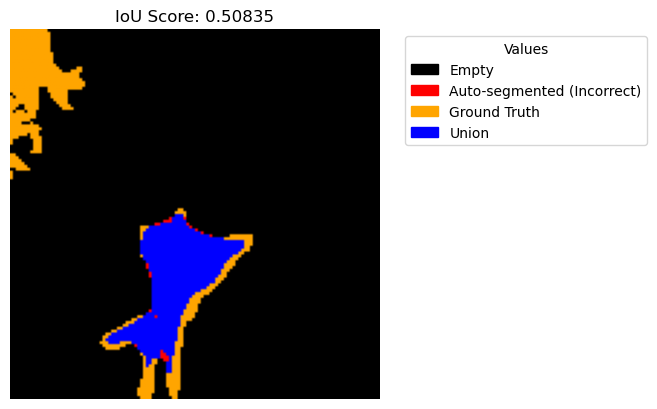

In [194]:
IoU_plot(ground[90], segmentation_SAM[90])
print(np.unique(segmentation_SAM[0], return_counts=True))
1 in np.unique(segmentation_SAM[0], return_counts=True)
# segmentation

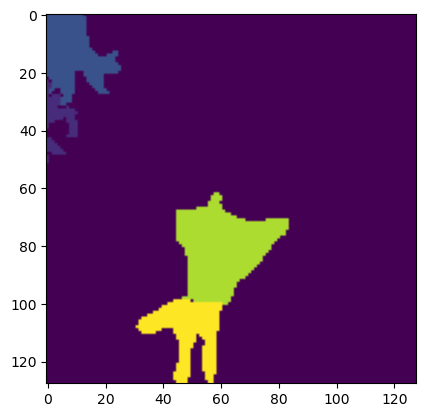

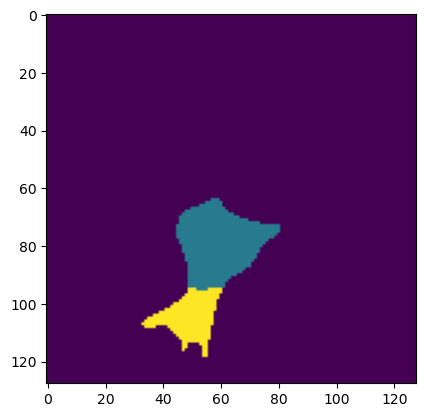

In [195]:
plt.imshow(ground[90])
plt.show()
plt.imshow(segmentation_SAM[90])
plt.show()